In [ ]:
# Clone the ECG reconstruction repository
!git clone https://github.com/scripps-research/ecg_reconstruction.git

Cloning into 'ecg_reconstruction'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 70 (delta 16), reused 63 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (70/70), 94.34 KiB | 5.90 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:
!pip install tensorflow keras numpy pandas matplotlib scikit-learn scipy wfdb h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [ ]:
!pip install pandas==2.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.3
    Uninstalling pandas-2.3.3:
      Successfully uninstalled pandas-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wfdb 4.3.0 requires pandas>=2.2.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Pandas version: 2.2.2
NumPy version: 2.0.2


In [ ]:
# Change directory into the cloned repo
%cd ecg_reconstruction

# Now list the contents
!ls -la

/content/ecg_reconstruction
total 148
drwxr-xr-x 10 root root  4096 Jan 20 08:44 .
drwxr-xr-x  1 root root  4096 Jan 20 08:44 ..
-rw-r--r--  1 root root  5485 Jan 20 08:44 analyze_dataclass.py
drwxr-xr-x  2 root root  4096 Jan 20 08:44 classify_functions
-rw-r--r--  1 root root  5999 Jan 20 08:44 clean_dataclass.py
-rw-r--r--  1 root root  7757 Jan 20 08:44 explore_dataset.py
drwxr-xr-x  2 root root  4096 Jan 20 08:44 explore_functions
-rw-r--r--  1 root root  5468 Jan 20 08:44 generate_dataclass.py
drwxr-xr-x  8 root root  4096 Jan 20 08:44 .git
drwxr-xr-x  2 root root  4096 Jan 20 08:44 learn_functions
drwxr-xr-x  2 root root  4096 Jan 20 08:44 load_functions
-rw-r--r--  1 root root  4773 Jan 20 08:44 multi_classification.py
-rw-r--r--  1 root root  6323 Jan 20 08:44 multi_recon_classif.py
-rw-r--r--  1 root root  6713 Jan 20 08:44 multi_reconstruction.py
drwxr-xr-x  2 root root  4096 Jan 20 08:44 plot_functions
-rw-r--r--  1 root root  8186 Jan 20 08:44 process_dataclass.py
-rw-r--r

In [ ]:
# See what files are in load_functions
print("=== Files in load_functions/ ===")
!ls -la load_functions/

print("\n=== Content of load functions ===")
!cat load_functions/*.py

=== Files in load_functions/ ===
total 52
drwxr-xr-x  2 root root  4096 Jan 20 08:44 .
drwxr-xr-x 10 root root  4096 Jan 20 08:44 ..
-rw-r--r--  1 root root 31394 Jan 20 08:44 data_loader.py
-rw-r--r--  1 root root  5810 Jan 20 08:44 load_leads.py
-rw-r--r--  1 root root  3887 Jan 20 08:44 train_loader.py

=== Content of load functions ===
import random
import numpy as np
from util_functions.general import get_collection
from util_functions.load_data_ids import load_dataclass_ids, load_learning_ids
from classify_functions.process_diagnosis import format_diagnosis
from load_functions.load_leads import load_element_twelve_leads
from itertools import chain


class DataLoader(object):
    def __init__(self,
                 parent_folder: str,
                 data_classes,
                 data_size: int,
                 detect_classes,
                 batch_size: int,
                 prioritize_percent: float,
                 prioritize_size: int,
                 sample_num: int,
  

In [ ]:
# Check what libraries are actually used
print("=== Imports in explore_dataset.py ===")
!head -50 explore_dataset.py

print("\n=== Imports in single_reconstruction.py ===")
!head -50 single_reconstruction.py

=== Imports in explore_dataset.py ===
from explore_functions.distribution_plot import distribution_plot
from explore_functions.compute_statistics import compute_statistics
from classify_functions.classify_dataset import classify_dataset
from explore_functions.compute_features import compute_feature_matrix, compute_feature_map
from util_functions.general import get_collection, get_parent_folder
import numpy as np
from tqdm import tqdm
import pandas as pd
import pathlib
import argparse

"""   

This script carries out an explorative analysis on the overall dataset.
Specifically, it makes it possible to (i) load the elements of the dataset, 
(ii) associate the elements with the clinical labels describing them,
(iii) compute some statistical information regarding each label of the dataset,
including the correlation of each couple of labels, (iv) plot the results
regarding the statistical information

The IDs of the elements associated with each clinical label are stored in the folder ./../

In [ ]:
# Check utility functions
print("=== Files in util_functions/ ===")
!ls -la util_functions/

print("\n=== Sample from util_functions ===")
!head -100 util_functions/*.py

=== Files in util_functions/ ===
total 108
drwxr-xr-x  2 root root  4096 Jan 20 08:44 .
drwxr-xr-x 10 root root  4096 Jan 20 08:44 ..
-rw-r--r--  1 root root 10032 Jan 20 08:44 classification_settings.py
-rw-r--r--  1 root root 11469 Jan 20 08:44 diagnosis_hierarchy.py
-rw-r--r--  1 root root 27261 Jan 20 08:44 diagnosis_map.py
-rw-r--r--  1 root root  2640 Jan 20 08:44 general.py
-rw-r--r--  1 root root 17501 Jan 20 08:44 load_data_ids.py
-rw-r--r--  1 root root 11330 Jan 20 08:44 recon_classif_settings.py
-rw-r--r--  1 root root 10304 Jan 20 08:44 reconstruction_settings.py

=== Sample from util_functions ===
==> util_functions/classification_settings.py <==
from util_functions.general import get_parent_folder, get_data_classes, get_detect_classes
from training_functions.single_classification_manager import ClassificationManager
from training_functions.multi_classification_manager import MultiClassificationManager


def get_classification_default_settings():
    
    data_size = 'max

In [ ]:
# Search for data path references
print("=== Searching for data paths in code ===")
!grep -rn "data_path\|DATA_PATH\|dataset_path\|DATASET" . --include="*.py" | head -20

print("\n=== Checking for config files ===")
!find . -name "*.json" -o -name "*.yaml" -o -name "*.yml" -o -name "config*"

=== Searching for data paths in code ===
./plot_functions/ecg_signal.py:494:                axis[0].set_title('ECG ' + str(signal_index + 1) + ' - DATASET ' + str(dataset_label), fontsize=35)
./training_functions/multi_reconstruction_manager.py:277:        # INITIALIZE THE DATASETS

=== Checking for config files ===
./.git/config


In [ ]:
# Let's look at the full explore_dataset.py to understand the workflow
print("=== Full explore_dataset.py ===")
!cat explore_dataset.py

=== Full explore_dataset.py ===
from explore_functions.distribution_plot import distribution_plot
from explore_functions.compute_statistics import compute_statistics
from classify_functions.classify_dataset import classify_dataset
from explore_functions.compute_features import compute_feature_matrix, compute_feature_map
from util_functions.general import get_collection, get_parent_folder
import numpy as np
from tqdm import tqdm
import pandas as pd
import pathlib
import argparse

"""   

This script carries out an explorative analysis on the overall dataset.
Specifically, it makes it possible to (i) load the elements of the dataset, 
(ii) associate the elements with the clinical labels describing them,
(iii) compute some statistical information regarding each label of the dataset,
including the correlation of each couple of labels, (iv) plot the results
regarding the statistical information

The IDs of the elements associated with each clinical label are stored in the folder ./../Data/F

In [ ]:
print("=== Files in training_functions/ ===")
!ls -la training_functions/

print("\n=== Sample from training_functions ===")
!head -100 training_functions/*.py

=== Files in training_functions/ ===
total 344
drwxr-xr-x  2 root root  4096 Jan 20 08:44 .
drwxr-xr-x 10 root root  4096 Jan 20 08:44 ..
-rw-r--r--  1 root root  4130 Jan 20 08:44 classification_functions.py
-rw-r--r--  1 root root 38012 Jan 20 08:44 multi_classification_manager.py
-rw-r--r--  1 root root 69878 Jan 20 08:44 multi_recon_classif_manager.py
-rw-r--r--  1 root root 31254 Jan 20 08:44 multi_reconstruction_manager.py
-rw-r--r--  1 root root  8506 Jan 20 08:44 multi_training_manager.py
-rw-r--r--  1 root root  7067 Jan 20 08:44 recon_classif_functions.py
-rw-r--r--  1 root root  5001 Jan 20 08:44 reconstruction_functions.py
-rw-r--r--  1 root root 49097 Jan 20 08:44 single_classification_manager.py
-rw-r--r--  1 root root 60967 Jan 20 08:44 single_recon_classif_manager.py
-rw-r--r--  1 root root 36442 Jan 20 08:44 single_reconstruction_manager.py
-rw-r--r--  1 root root  8724 Jan 20 08:44 single_training_manager.py

=== Sample from training_functions ===
==> training_functio

In [ ]:
# Cell 1: Mount Drive and Copy Dataset
from google.colab import drive
drive.mount('/content/drive')

import os
import zipfile
from pathlib import Path

# Create data directory
data_dir = Path('/content/data')
data_dir.mkdir(parents=True, exist_ok=True)

print("Copying PTB-XL dataset from Google Drive...")
source_path = '/content/drive/MyDrive/IMLE-Net-Project/data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1.zip'
dest_path = '/content/data/ptb-xl.zip'

if os.path.exists(source_path):
    print(f"✓ Found dataset at: {source_path}")
    print("Copying file (this may take a few minutes)...")
    !cp {source_path} {dest_path}
    print("✓ File copied successfully!")

    print("\nExtracting dataset...")
    with zipfile.ZipFile(dest_path, 'r') as zip_ref:
        zip_ref.extractall('/content/data/')
    print("✓ Dataset extracted successfully!")

    # Verify
    extracted_folders = list(Path('/content/data').glob('ptb-xl-*'))
    if extracted_folders:
        dataset_path = extracted_folders[0]
        print(f"\n✓ Dataset ready at: {dataset_path}")

        # Verify key files
        key_files = ['ptbxl_database.csv', 'scp_statements.csv', 'records100', 'records500']
        print("\nDataset contents:")
        for item in key_files:
            item_path = dataset_path / item
            if item_path.exists():
                print(f"  ✓ {item}")
            else:
                print(f"  ✗ {item} - MISSING!")
    else:
        print("⚠ Warning: Could not find extracted folder")
else:
    print(f"❌ Error: Dataset not found at {source_path}")

Mounted at /content/drive
Copying PTB-XL dataset from Google Drive...
✓ Found dataset at: /content/drive/MyDrive/IMLE-Net-Project/data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1.zip
Copying file (this may take a few minutes)...
✓ File copied successfully!

Extracting dataset...
✓ Dataset extracted successfully!

✓ Dataset ready at: /content/data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1

Dataset contents:
  ✓ ptbxl_database.csv
  ✓ scp_statements.csv
  ✓ records100
  ✓ records500


In [ ]:
# Cell 1: Install Dependencies and Setup
# Run this first to install all required packages

!pip install -q wfdb pandas numpy matplotlib scikit-learn torch torchvision torchaudio

print("✓ Dependencies installed successfully!")
print("\nNext: Run Cell 2 to download the PTB-XL dataset")

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
✓ Dependencies installed successfully!

Next: Run Cell 2 to download the PTB-XL dataset


In [ ]:
# Cell 1: Install dependencies and setup
!pip install wfdb -q

import sys
sys.path.append('/content/ecg_reconstruction')

# Verify repository is accessible
import os
print("Repository files:")
print(os.listdir('/content/ecg_reconstruction'))

Repository files:
['README.md', 'util_functions', 'process_dataset.py', 'single_recon_classif.py', '.git', 'classify_functions', 'explore_functions', 'load_functions', 'single_reconstruction.py', 'learn_functions', 'explore_dataset.py', 'generate_dataclass.py', 'multi_reconstruction.py', 'analyze_dataclass.py', 'multi_classification.py', 'single_classification.py', 'multi_recon_classif.py', 'plot_functions', 'process_dataclass.py', 'clean_dataclass.py', 'training_functions']


In [ ]:
# Cell 2: Examine their data loader to understand format
!head -50 /content/ecg_reconstruction/load_functions/data_loader.py

import random
import numpy as np
from util_functions.general import get_collection
from util_functions.load_data_ids import load_dataclass_ids, load_learning_ids
from classify_functions.process_diagnosis import format_diagnosis
from load_functions.load_leads import load_element_twelve_leads
from itertools import chain


class DataLoader(object):
    def __init__(self,
                 parent_folder: str,
                 data_classes,
                 data_size: int,
                 detect_classes,
                 batch_size: int,
                 prioritize_percent: float,
                 prioritize_size: int,
                 sample_num: int,
                 min_value: float,
                 amplitude: float):

        self.collection = get_collection()
        
        self.parent_folder = parent_folder
        self.data_classes = data_classes

        self.train_data_ids, self.valid_data_ids, self.test_data_ids =\
            load_learning_ids(self.parent_folder, self.data_cla

In [ ]:
# Cell 3: Check their reconstruction settings
!head -100 /content/ecg_reconstruction/util_functions/reconstruction_settings.py

from util_functions.general import get_parent_folder, get_data_classes
from training_functions.single_reconstruction_manager import ReconstructionManager
from training_functions.multi_reconstruction_manager import MultiReconstructionManager
    

def get_reconstruction_default_settings():
    
    data_size = 'max'
        
    input_channel = 32
        
    middle_channel = 32
        
    output_channel = 32
        
    input_depth = 3
        
    middle_depth = 2
        
    output_depth = 3
        
    input_kernel = 17
        
    middle_kernel = 17
        
    output_kernel = 17
        
    use_residual = 'true'
        
    epoch_num = 200
        
    batch_size = 16
        
    prioritize_percent = 0
    
    prioritize_size = 0
        
    optimizer = 'adam'
        
    learning_rate = 0.000003
        
    weight_decay = 0.001
        
    momentum = 0.9
        
    nesterov = 'true'
    
    return data_size, input_channel, middle_channel, output_channel, input_

In [ ]:
# Cell 4: Check what dataset format they expect
!grep -n "dataset\|data_path\|load" /content/ecg_reconstruction/single_reconstruction.py | head -30

19:    parser.add_argument('-dataset', '--dataset', type=str, default=None)
62:        manager.load_train_stats()
66:        manager.load_valid_stats()
70:        manager.load_test_stats(compute_loss_per_sample=args['compute_loss_per_sample'])
74:        manager.load_model_stats()
78:        manager.load_model()
92:            manager.load_dataset(train=True, valid=True)
96:            manager.release_dataset()
106:            manager.load_train_stats()
110:            manager.load_valid_stats()
118:            manager.load_model()
120:            manager.load_dataset(test=True, extract_qrs=args['compute_loss_per_sample'])
124:            manager.release_dataset()
132:            manager.load_test_stats(compute_loss_per_sample=args['compute_loss_per_sample'])
140:            manager.load_model()
150:            manager.load_model_stats()
158:            manager.load_model()
166:            manager.load_test_stats(compute_loss_per_sample=args['compute_loss_per_sample'])
168:            

In [ ]:
# Cell 5: Look at their data loader implementation
with open('/content/ecg_reconstruction/load_functions/data_loader.py', 'r') as f:
    lines = f.readlines()[:200]
    print(''.join(lines))

import random
import numpy as np
from util_functions.general import get_collection
from util_functions.load_data_ids import load_dataclass_ids, load_learning_ids
from classify_functions.process_diagnosis import format_diagnosis
from load_functions.load_leads import load_element_twelve_leads
from itertools import chain


class DataLoader(object):
    def __init__(self,
                 parent_folder: str,
                 data_classes,
                 data_size: int,
                 detect_classes,
                 batch_size: int,
                 prioritize_percent: float,
                 prioritize_size: int,
                 sample_num: int,
                 min_value: float,
                 amplitude: float):

        self.collection = get_collection()
        
        self.parent_folder = parent_folder
        self.data_classes = data_classes

        self.train_data_ids, self.valid_data_ids, self.test_data_ids =\
            load_learning_ids(self.parent_folder, self.data_cla

In [ ]:
# Cell 6: Check reconstructor architecture (the model)
with open('/content/ecg_reconstruction/learn_functions/reconstructor.py', 'r') as f:
    print(f.read())

from learn_functions.convolutional_network import ParallelConvolutionalNetwork, SymmetricConvolutionalNetwork
import torch
import numpy as np


class Reconstructor(object):

    """
    class Reconstructor

    """

    def __init__(self,
                 input_lead_num: int,
                 output_lead_num: int,
                 input_channel_per_lead: int,
                 middle_channel_per_lead: int,
                 output_channel_per_lead: int,
                 block_per_input_network: int,
                 block_per_middle_network: int,
                 block_per_output_network: int,
                 input_kernel_size: int,
                 middle_kernel_size: int,
                 output_kernel_size: int,
                 activation_function: str,
                 use_residual_block: bool,
                 device
                 ):

        self.output_lead_num = output_lead_num
        self.output_channel_per_lead = output_channel_per_lead
        
        self.input_network

In [ ]:
# Cell 7: Check reconstruction training functions
with open('/content/ecg_reconstruction/training_functions/reconstruction_functions.py', 'r') as f:
    print(f.read())

import torch
import numpy as np


def process_element(input_leads,
                    output_leads,
                    min_value: float,
                    amplitude: float,
                    device):
    
    model_input = [torch.unsqueeze(torch.unsqueeze(torch.from_numpy(lead).float().to(device), 0), 0) for lead in input_leads]

    model_target = [torch.from_numpy(lead * amplitude + min_value).float().to(device).detach() for lead in output_leads]

    return model_input, model_target


def deprocess_element(model_output):

    return [lead.detach().cpu().numpy() for lead in model_output]


def process_batch(batch,
                  input_lead_num: int,
                  output_lead_num: int,                  
                  min_value: float,
                  amplitude: float,
                  device):

    model_input = [[] for _ in range(input_lead_num)]
    model_target = [[] for _ in range(output_lead_num)]

    for input_leads, output_leads, _, _, _ in batch:

        

In [ ]:
# Cell 1: Run this first to update the loader
%%writefile /content/ecg_reconstruction/load_functions/ptbxl_loader.py
import wfdb
import pandas as pd
import numpy as np
from pathlib import Path
import ast
from scipy.interpolate import interp1d

class PTBXLDataLoader:
    """PTB-XL data loader that mimics their DataLoader interface"""

    def __init__(self, data_path, batch_size=16, sample_num=2500, min_value=-2.5, amplitude=5.0):
        self.data_path = Path(data_path)
        self.batch_size = batch_size
        self.sample_num = sample_num
        self.min_value = min_value
        self.amplitude = amplitude

        # Load metadata
        metadata_file = self.data_path / 'ptbxl_database.csv'
        self.metadata = pd.read_csv(metadata_file, index_col='ecg_id')

        # Split by strat_fold
        self.train_data_ids = self.metadata[self.metadata.strat_fold <= 8].index.tolist()
        self.valid_data_ids = self.metadata[self.metadata.strat_fold == 9].index.tolist()
        self.test_data_ids = self.metadata[self.metadata.strat_fold == 10].index.tolist()

        self.train_data_size = len(self.train_data_ids)
        self.valid_data_size = len(self.valid_data_ids)
        self.test_data_size = len(self.test_data_ids)

        # Calculate actual number of batches
        self.train_batches = int(np.ceil(self.train_data_size / self.batch_size))
        self.valid_batches = int(np.ceil(self.valid_data_size / self.batch_size))
        self.test_batches = int(np.ceil(self.test_data_size / self.batch_size))

        print(f"Train: {self.train_data_size} ({self.train_batches} batches)")
        print(f"Valid: {self.valid_data_size} ({self.valid_batches} batches)")
        print(f"Test: {self.test_data_size} ({self.test_batches} batches)")

    def load_element_twelve_leads(self, ecg_id):
        """Load and process single ECG"""
        filename = self.metadata.loc[ecg_id, 'filename_lr']
        filepath = self.data_path / filename
        record = wfdb.rdrecord(str(filepath))
        signal = record.p_signal  # (samples, 12)

        # Resample
        current_length = signal.shape[0]
        if current_length != self.sample_num:
            x_old = np.linspace(0, 1, current_length)
            x_new = np.linspace(0, 1, self.sample_num)
            resampled = np.zeros((self.sample_num, 12))
            for i in range(12):
                f = interp1d(x_old, signal[:, i], kind='linear')
                resampled[:, i] = f(x_new)
            signal = resampled

        # Normalize
        signal = np.clip(signal, self.min_value, self.min_value + self.amplitude)
        signal = (signal - self.min_value) / self.amplitude

        # Return: I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5, V6
        return signal.T  # (12, samples)

    def get_train_batch_generator(self):
        """Generator for training batches"""
        indices = np.random.permutation(self.train_data_size)
        for i in range(0, self.train_data_size, self.batch_size):
            end_idx = min(i + self.batch_size, self.train_data_size)
            batch_indices = indices[i:end_idx]
            batch_ids = [self.train_data_ids[idx] for idx in batch_indices]
            batch = []
            for ecg_id in batch_ids:
                try:
                    twelve_leads = self.load_element_twelve_leads(ecg_id)
                    # Input: I (0), II (1), V3 (8)
                    input_leads = [twelve_leads[0], twelve_leads[1], twelve_leads[8]]
                    # Output: V1-V6 (6-11)
                    output_leads = [twelve_leads[i] for i in range(6, 12)]
                    batch.append((input_leads, output_leads, ecg_id, None, None))
                except Exception as e:
                    print(f"Error loading {ecg_id}: {e}")
                    continue
            if len(batch) > 0:
                yield batch

    def get_valid_batch_generator(self):
        """Generator for validation batches"""
        for i in range(0, self.valid_data_size, self.batch_size):
            end_idx = min(i + self.batch_size, self.valid_data_size)
            batch_ids = self.valid_data_ids[i:end_idx]
            batch = []
            for ecg_id in batch_ids:
                try:
                    twelve_leads = self.load_element_twelve_leads(ecg_id)
                    input_leads = [twelve_leads[0], twelve_leads[1], twelve_leads[8]]
                    output_leads = [twelve_leads[i] for i in range(6, 12)]
                    batch.append((input_leads, output_leads, ecg_id, None, None))
                except Exception as e:
                    print(f"Error loading {ecg_id}: {e}")
                    continue
            if len(batch) > 0:
                yield batch

    def get_test_batch_generator(self):
        """Generator for test batches"""
        for i in range(0, self.test_data_size, self.batch_size):
            end_idx = min(i + self.batch_size, self.test_data_size)
            batch_ids = self.test_data_ids[i:end_idx]
            batch = []
            for ecg_id in batch_ids:
                try:
                    twelve_leads = self.load_element_twelve_leads(ecg_id)
                    input_leads = [twelve_leads[0], twelve_leads[1], twelve_leads[8]]
                    output_leads = [twelve_leads[i] for i in range(6, 12)]
                    batch.append((input_leads, output_leads, ecg_id, None, None))
                except Exception as e:
                    print(f"Error loading {ecg_id}: {e}")
                    continue
            if len(batch) > 0:
                yield batch

print("✓ PTB-XL loader updated with batch counts")

Writing /content/ecg_reconstruction/load_functions/ptbxl_loader.py


In [ ]:
# Update the train_ptbxl.py file with the corrected save_checkpoint function
%%writefile /content/train_ptbxl.py
import sys
sys.path.append('/content/ecg_reconstruction')

import torch
import numpy as np
from tqdm import tqdm
from pathlib import Path
import shutil
from learn_functions.reconstructor import Reconstructor
from training_functions.reconstruction_functions import process_batch, batch_r2_function, batch_mse_function
from load_functions.ptbxl_loader import PTBXLDataLoader

# ============================================================================
# CONFIGURATION
# ============================================================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_path = '/content/data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1'

# Training hyperparameters
batch_size = 16
epochs = 20
min_value = -2.5
amplitude = 5.0
sample_num = 2500

# ============================================================================
# CHECKPOINT CONFIGURATION - CUSTOMIZE THIS!
# ============================================================================
SAVE_TO_DRIVE = True
DRIVE_CHECKPOINT_DIR = '/content/drive/MyDrive/IMLE-Net-Project/checkpoints'
SAVE_EVERY_EPOCH = True
SAVE_BEST_ONLY = False
KEEP_LAST_N_CHECKPOINTS = 3

# ============================================================================
# SETUP CHECKPOINT DIRECTORY
# ============================================================================
if SAVE_TO_DRIVE:
    checkpoint_dir = Path(DRIVE_CHECKPOINT_DIR)
    checkpoint_dir.mkdir(parents=True, exist_ok=True)
    print(f"✅ Checkpoints will be saved to: {checkpoint_dir}")
    print(f"   Strategy: {'Every epoch' if SAVE_EVERY_EPOCH else 'Best only'}")
    if KEEP_LAST_N_CHECKPOINTS:
        print(f"   Retention: Keep last {KEEP_LAST_N_CHECKPOINTS} checkpoints")
else:
    checkpoint_dir = Path('/content/checkpoints')
    checkpoint_dir.mkdir(parents=True, exist_ok=True)
    print(f"⚠️  Checkpoints will be saved to Colab temp storage: {checkpoint_dir}")

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================
def get_model_state_dict(model):
    """Extract state dict from the custom Reconstructor model"""
    # The model uses custom wrapper classes, we need to save their internal parameters
    state_dict = {
        'input_network_params': model.input_network.named_parameters(),
        'middle_network_params': model.middle_network.named_parameters(),
        'output_network_params': model.output_network.named_parameters()
    }
    return state_dict

def save_checkpoint(epoch, model, optimizer, scheduler, history, metrics, is_best=False):
    """Save a checkpoint to Google Drive"""

    # Create checkpoint data - save the model using their built-in method
    checkpoint = {
        'epoch': epoch,
        'history': history,
        'metrics': metrics,
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'config': {
            'batch_size': batch_size,
            'learning_rate': 0.000003,
            'sample_num': sample_num,
            'min_value': min_value,
            'amplitude': amplitude
        }
    }

    # Save to temp location first (without model - we'll use their method)
    temp_checkpoint_path = Path('/content/temp_checkpoint.pt')
    temp_model_path = Path('/content/temp_model')

    # Save checkpoint metadata
    torch.save(checkpoint, temp_checkpoint_path)

    # Save model using their built-in save method
    model.save_state_dict(str(temp_model_path) + '/')

    # Copy to Drive
    if SAVE_EVERY_EPOCH:
        epoch_checkpoint_path = checkpoint_dir / f'checkpoint_epoch_{epoch:03d}.pt'
        epoch_model_path = checkpoint_dir / f'model_epoch_{epoch:03d}'

        # Copy checkpoint metadata
        shutil.copy(temp_checkpoint_path, epoch_checkpoint_path)

        # Copy model directory
        if epoch_model_path.exists():
            shutil.rmtree(epoch_model_path)
        shutil.copytree(temp_model_path, epoch_model_path)

        print(f"   💾 Saved checkpoint: checkpoint_epoch_{epoch:03d}.pt + model")

    # Save best model separately
    if is_best:
        best_checkpoint_path = checkpoint_dir / 'best_checkpoint.pt'
        best_model_path = checkpoint_dir / 'best_model'

        shutil.copy(temp_checkpoint_path, best_checkpoint_path)

        if best_model_path.exists():
            shutil.rmtree(best_model_path)
        shutil.copytree(temp_model_path, best_model_path)

        print(f"   🏆 Saved best model!")

    # Clean up old checkpoints if needed
    if KEEP_LAST_N_CHECKPOINTS and SAVE_EVERY_EPOCH:
        all_checkpoints = sorted(checkpoint_dir.glob('checkpoint_epoch_*.pt'))
        if len(all_checkpoints) > KEEP_LAST_N_CHECKPOINTS:
            for old_checkpoint in all_checkpoints[:-KEEP_LAST_N_CHECKPOINTS]:
                # Remove checkpoint file
                old_checkpoint.unlink()

                # Remove corresponding model directory
                epoch_num = old_checkpoint.stem.split('_')[-1]
                old_model_dir = checkpoint_dir / f'model_epoch_{epoch_num}'
                if old_model_dir.exists():
                    shutil.rmtree(old_model_dir)

                print(f"   🗑️  Removed old checkpoint: {old_checkpoint.name}")

    # Clean up temp files
    temp_checkpoint_path.unlink()
    shutil.rmtree(temp_model_path)

def load_checkpoint(checkpoint_path, model_path, model, optimizer, scheduler):
    """Load a checkpoint from file"""
    # Load checkpoint metadata
    checkpoint = torch.load(checkpoint_path, map_location=device)

    # Load model using their built-in load method
    model.load_state_dict(str(model_path) + '/')

    # Restore optimizer and scheduler
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    scheduler.load_state_dict(checkpoint['scheduler_state_dict'])

    return checkpoint

# ============================================================================
# LOAD DATA
# ============================================================================
print("\n" + "="*70)
print("LOADING PTB-XL DATASET")
print("="*70)
data_loader = PTBXLDataLoader(data_path, batch_size, sample_num, min_value, amplitude)

# ============================================================================
# CREATE MODEL
# ============================================================================
print("\n" + "="*70)
print("CREATING MODEL")
print("="*70)
model = Reconstructor(
    input_lead_num=3,
    output_lead_num=6,
    input_channel_per_lead=32,
    middle_channel_per_lead=32,
    output_channel_per_lead=32,
    block_per_input_network=3,
    block_per_middle_network=2,
    block_per_output_network=3,
    input_kernel_size=17,
    middle_kernel_size=17,
    output_kernel_size=17,
    activation_function='relu',
    use_residual_block=True,
    device=device
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.000003, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

print(f"✅ Setup complete on {device}")
print(f"   Batches: Train={data_loader.train_batches}, Val={data_loader.valid_batches}")
print(f"   Target: R²=72.98%, MSE=0.0127 mV²\n")

# ============================================================================
# TRAINING LOOP
# ============================================================================
history = {'train_r2_loss': [], 'train_mse': [], 'val_r2_loss': [], 'val_mse': []}
best_val_r2 = float('inf')
start_epoch = 1

# Check for existing checkpoints to resume from
existing_checkpoints = sorted(checkpoint_dir.glob('checkpoint_epoch_*.pt'))
if existing_checkpoints:
    print(f"\n🔍 Found {len(existing_checkpoints)} existing checkpoints")
    latest_checkpoint = existing_checkpoints[-1]
    epoch_num = latest_checkpoint.stem.split('_')[-1]
    latest_model_path = checkpoint_dir / f'model_epoch_{epoch_num}'

    print(f"Latest: {latest_checkpoint.name}")
    print(f"📂 Loading checkpoint to resume training...")

    checkpoint = load_checkpoint(latest_checkpoint, latest_model_path, model, optimizer, scheduler)

    history = checkpoint['history']
    start_epoch = checkpoint['epoch'] + 1
    best_val_r2 = checkpoint['metrics']['best_val_r2']

    print(f"✅ Resumed from epoch {checkpoint['epoch']}")
    print(f"   Best R²: {-best_val_r2*100:.2f}%\n")

for epoch in range(start_epoch, epochs + 1):
    print(f"\n{'='*70}")
    print(f"Epoch {epoch}/{epochs}")
    print(f"{'='*70}")

    # ========================================================================
    # TRAINING PHASE
    # ========================================================================
    train_r2_loss = 0
    train_mse = 0
    train_batches = 0

    train_gen = data_loader.get_train_batch_generator()
    pbar = tqdm(enumerate(train_gen),
                total=data_loader.train_batches,
                desc=f'Train E{epoch}',
                bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}] {postfix}')

    for batch_idx, batch in pbar:
        model_input, model_target = process_batch(batch, 3, 6, min_value, amplitude, device)

        optimizer.zero_grad()
        model_output = model.forward(model_input)
        r2_loss, _ = batch_r2_function(model_output, model_target, 6, len(batch), False)
        r2_loss.backward()
        optimizer.step()

        mse, _ = batch_mse_function(model_output, model_target, 6, len(batch), False)
        train_r2_loss += r2_loss.item()
        train_mse += mse.item()
        train_batches += 1

        avg_r2 = -(train_r2_loss / train_batches) * 100
        avg_mse = train_mse / train_batches

        pbar.set_postfix({
            'R²': f'{avg_r2:.1f}%',
            'MSE': f'{avg_mse:.4f}'
        })

    train_r2_loss /= train_batches
    train_mse /= train_batches

    # ========================================================================
    # VALIDATION PHASE
    # ========================================================================
    val_r2_loss = 0
    val_mse = 0
    val_batches = 0

    with torch.no_grad():
        val_gen = data_loader.get_valid_batch_generator()
        pbar = tqdm(enumerate(val_gen),
                    total=data_loader.valid_batches,
                    desc=f'Valid E{epoch}',
                    bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}] {postfix}')

        for batch_idx, batch in pbar:
            model_input, model_target = process_batch(batch, 3, 6, min_value, amplitude, device)
            model_output = model.forward(model_input)
            r2_loss, _ = batch_r2_function(model_output, model_target, 6, len(batch), False)
            mse, _ = batch_mse_function(model_output, model_target, 6, len(batch), False)
            val_r2_loss += r2_loss.item()
            val_mse += mse.item()
            val_batches += 1

            avg_r2 = -(val_r2_loss / val_batches) * 100
            avg_mse = val_mse / val_batches
            pbar.set_postfix({'R²': f'{avg_r2:.1f}%', 'MSE': f'{avg_mse:.4f}'})

    val_r2_loss /= val_batches
    val_mse /= val_batches

    # ========================================================================
    # UPDATE LEARNING RATE
    # ========================================================================
    scheduler.step(val_r2_loss)

    # ========================================================================
    # SAVE METRICS
    # ========================================================================
    history['train_r2_loss'].append(train_r2_loss)
    history['train_mse'].append(train_mse)
    history['val_r2_loss'].append(val_r2_loss)
    history['val_mse'].append(val_mse)

    train_r2_score = -train_r2_loss
    val_r2_score = -val_r2_loss

    # ========================================================================
    # PRINT EPOCH SUMMARY
    # ========================================================================
    print(f"\n📊 Epoch {epoch} Summary:")
    print(f"   Train → R²: {train_r2_score*100:6.2f}% | MSE: {train_mse:.6f}")
    print(f"   Valid → R²: {val_r2_score*100:6.2f}% | MSE: {val_mse:.6f}")
    print(f"   Paper → R²:  72.98% | MSE: 0.012700")

    # ========================================================================
    # SAVE CHECKPOINT
    # ========================================================================
    is_best = val_r2_loss < best_val_r2
    if is_best:
        best_val_r2 = val_r2_loss
        print(f"   ✅ NEW BEST MODEL! (R²={-best_val_r2*100:.2f}%)")

    # Save based on strategy
    should_save = False
    if SAVE_EVERY_EPOCH:
        should_save = True
    elif SAVE_BEST_ONLY and is_best:
        should_save = True

    if should_save and SAVE_TO_DRIVE:
        metrics = {
            'train_r2': train_r2_score,
            'val_r2': val_r2_score,
            'train_mse': train_mse,
            'val_mse': val_mse,
            'best_val_r2': best_val_r2
        }
        save_checkpoint(epoch, model, optimizer, scheduler, history, metrics, is_best)

    print(f"{'='*70}")

# ============================================================================
# TRAINING COMPLETE
# ============================================================================
print(f"\n{'🎉'*20}")
print(f"TRAINING COMPLETE!")
print(f"Best Validation R²: {-best_val_r2*100:.2f}%")
print(f"Paper Target R²: 72.98%")
print(f"{'🎉'*20}\n")

# Save final history
np.save(checkpoint_dir / 'training_history.npy', history)
print(f"✅ Training history saved to: {checkpoint_dir / 'training_history.npy'}")

if SAVE_TO_DRIVE:
    print(f"\n📁 All checkpoints saved to Google Drive:")
    print(f"   {DRIVE_CHECKPOINT_DIR}")
    print(f"\n💡 To resume training, simply re-run this script!")

Overwriting /content/train_ptbxl.py


In [ ]:
# Cell 3: Run Training
!python /content/train_ptbxl.py

✓ PTB-XL loader updated with batch counts
✅ Checkpoints will be saved to: /content/drive/MyDrive/IMLE-Net-Project/checkpoints
   Strategy: Every epoch
   Retention: Keep last 3 checkpoints

LOADING PTB-XL DATASET
Train: 17441 (1091 batches)
Valid: 2193 (138 batches)
Test: 2203 (138 batches)

CREATING MODEL
✅ Setup complete on cuda
   Batches: Train=1091, Val=138
   Target: R²=72.98%, MSE=0.0127 mV²


🔍 Found 3 existing checkpoints
Latest: checkpoint_epoch_020.pt
📂 Loading checkpoint to resume training...
✅ Resumed from epoch 20
   Best R²: 65.48%


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
TRAINING COMPLETE!
Best Validation R²: 65.48%
Paper Target R²: 72.98%
🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉

✅ Training history saved to: /content/drive/MyDrive/IMLE-Net-Project/checkpoints/training_history.npy

📁 All checkpoints saved to Google Drive:
   /content/drive/MyDrive/IMLE-Net-Project/checkpoints

💡 To resume training, simply re-run this script!


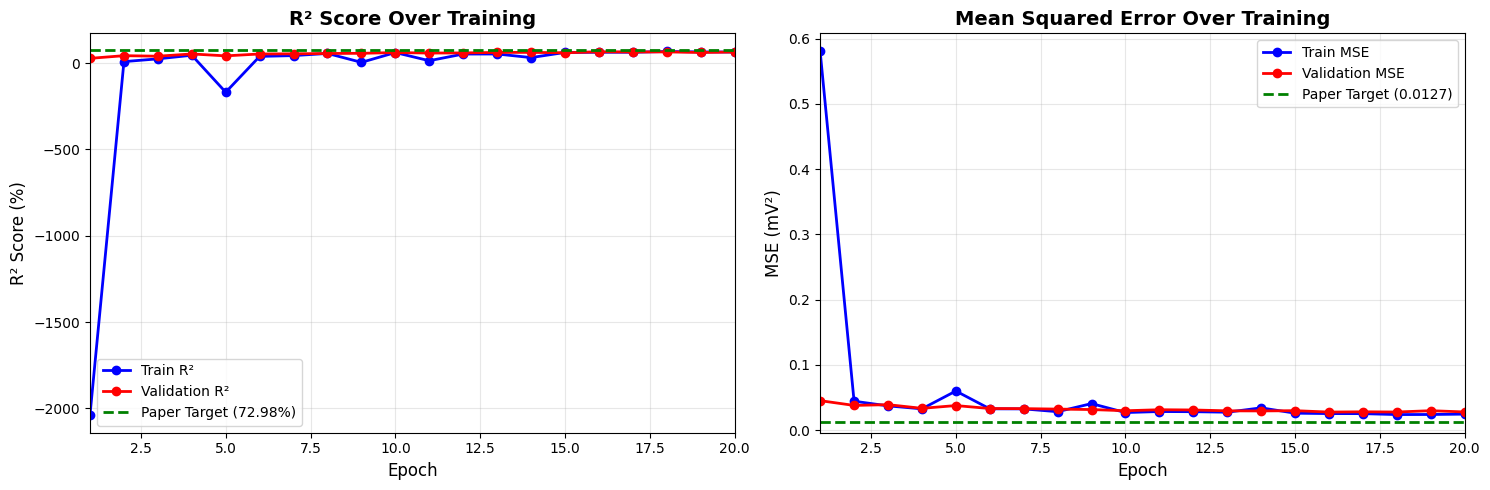

TRAINING SUMMARY

Best Training R²:    67.20% (Epoch 18)
Best Validation R²:  65.48% (Epoch 16)
Paper Target R²:     72.98%

Best Training MSE:   0.023913 (Epoch 18)
Best Validation MSE: 0.027738 (Epoch 16)
Paper Target MSE:    0.012700

Final Validation R²: 64.07%
Final Validation MSE: 0.027914


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the training history
history = np.load('/content/drive/MyDrive/IMLE-Net-Project/checkpoints/training_history.npy', allow_pickle=True).item()

# Convert R² loss to R² score (negative of loss)
train_r2_scores = [-loss * 100 for loss in history['train_r2_loss']]
val_r2_scores = [-loss * 100 for loss in history['val_r2_loss']]

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot R² Score
ax1.plot(range(1, len(train_r2_scores) + 1), train_r2_scores, 'b-o', label='Train R²', linewidth=2, markersize=6)
ax1.plot(range(1, len(val_r2_scores) + 1), val_r2_scores, 'r-o', label='Validation R²', linewidth=2, markersize=6)
ax1.axhline(y=72.98, color='g', linestyle='--', label='Paper Target (72.98%)', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('R² Score (%)', fontsize=12)
ax1.set_title('R² Score Over Training', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1, len(train_r2_scores))

# Plot MSE
ax2.plot(range(1, len(history['train_mse']) + 1), history['train_mse'], 'b-o', label='Train MSE', linewidth=2, markersize=6)
ax2.plot(range(1, len(history['val_mse']) + 1), history['val_mse'], 'r-o', label='Validation MSE', linewidth=2, markersize=6)
ax2.axhline(y=0.0127, color='g', linestyle='--', label='Paper Target (0.0127)', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('MSE (mV²)', fontsize=12)
ax2.set_title('Mean Squared Error Over Training', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(1, len(history['train_mse']))

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/IMLE-Net-Project/checkpoints/training_progress.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("=" * 70)
print("TRAINING SUMMARY")
print("=" * 70)
print(f"\nBest Training R²:    {max(train_r2_scores):.2f}% (Epoch {train_r2_scores.index(max(train_r2_scores)) + 1})")
print(f"Best Validation R²:  {max(val_r2_scores):.2f}% (Epoch {val_r2_scores.index(max(val_r2_scores)) + 1})")
print(f"Paper Target R²:     72.98%")
print(f"\nBest Training MSE:   {min(history['train_mse']):.6f} (Epoch {history['train_mse'].index(min(history['train_mse'])) + 1})")
print(f"Best Validation MSE: {min(history['val_mse']):.6f} (Epoch {history['val_mse'].index(min(history['val_mse'])) + 1})")
print(f"Paper Target MSE:    0.012700")
print(f"\nFinal Validation R²: {val_r2_scores[-1]:.2f}%")
print(f"Final Validation MSE: {history['val_mse'][-1]:.6f}")
print("=" * 70)

Loading data...
Train: 17441 (1091 batches)
Valid: 2193 (138 batches)
Test: 2203 (138 batches)
Creating model...
Loading best model weights...
✅ Model loaded successfully!

Evaluating on test set...


Testing: 100%|██████████| 138/138 [00:22<00:00,  6.25it/s]



Predictions shape (Original): (2203, 15000)
Targets shape (Original): (2203, 15000)
Predictions shape (Reshaped): (2203, 6, 2500)
Targets shape (Reshaped): (2203, 6, 2500)

PER-LEAD ACCURACY METRICS

V1:
  R² Score:      53.87%
  MSE:          0.022900 mV²
  RMSE:         0.151328 mV
  MAE:          0.079022 mV
  Correlation:  0.7408

V2:
  R² Score:      65.64%
  MSE:          0.035624 mV²
  RMSE:         0.188744 mV
  MAE:          0.101989 mV
  Correlation:  0.8161

V3:
  R² Score:      94.18%
  MSE:          0.005832 mV²
  RMSE:         0.076364 mV
  MAE:          0.048470 mV
  Correlation:  0.9707

V4:
  R² Score:      61.43%
  MSE:          0.030571 mV²
  RMSE:         0.174847 mV
  MAE:          0.094997 mV
  Correlation:  0.7854

V5:
  R² Score:      44.50%
  MSE:          0.037170 mV²
  RMSE:         0.192795 mV
  MAE:          0.109158 mV
  Correlation:  0.6678

V6:
  R² Score:      41.86%
  MSE:          0.032708 mV²
  RMSE:         0.180853 mV
  MAE:          0.096348 mV
 

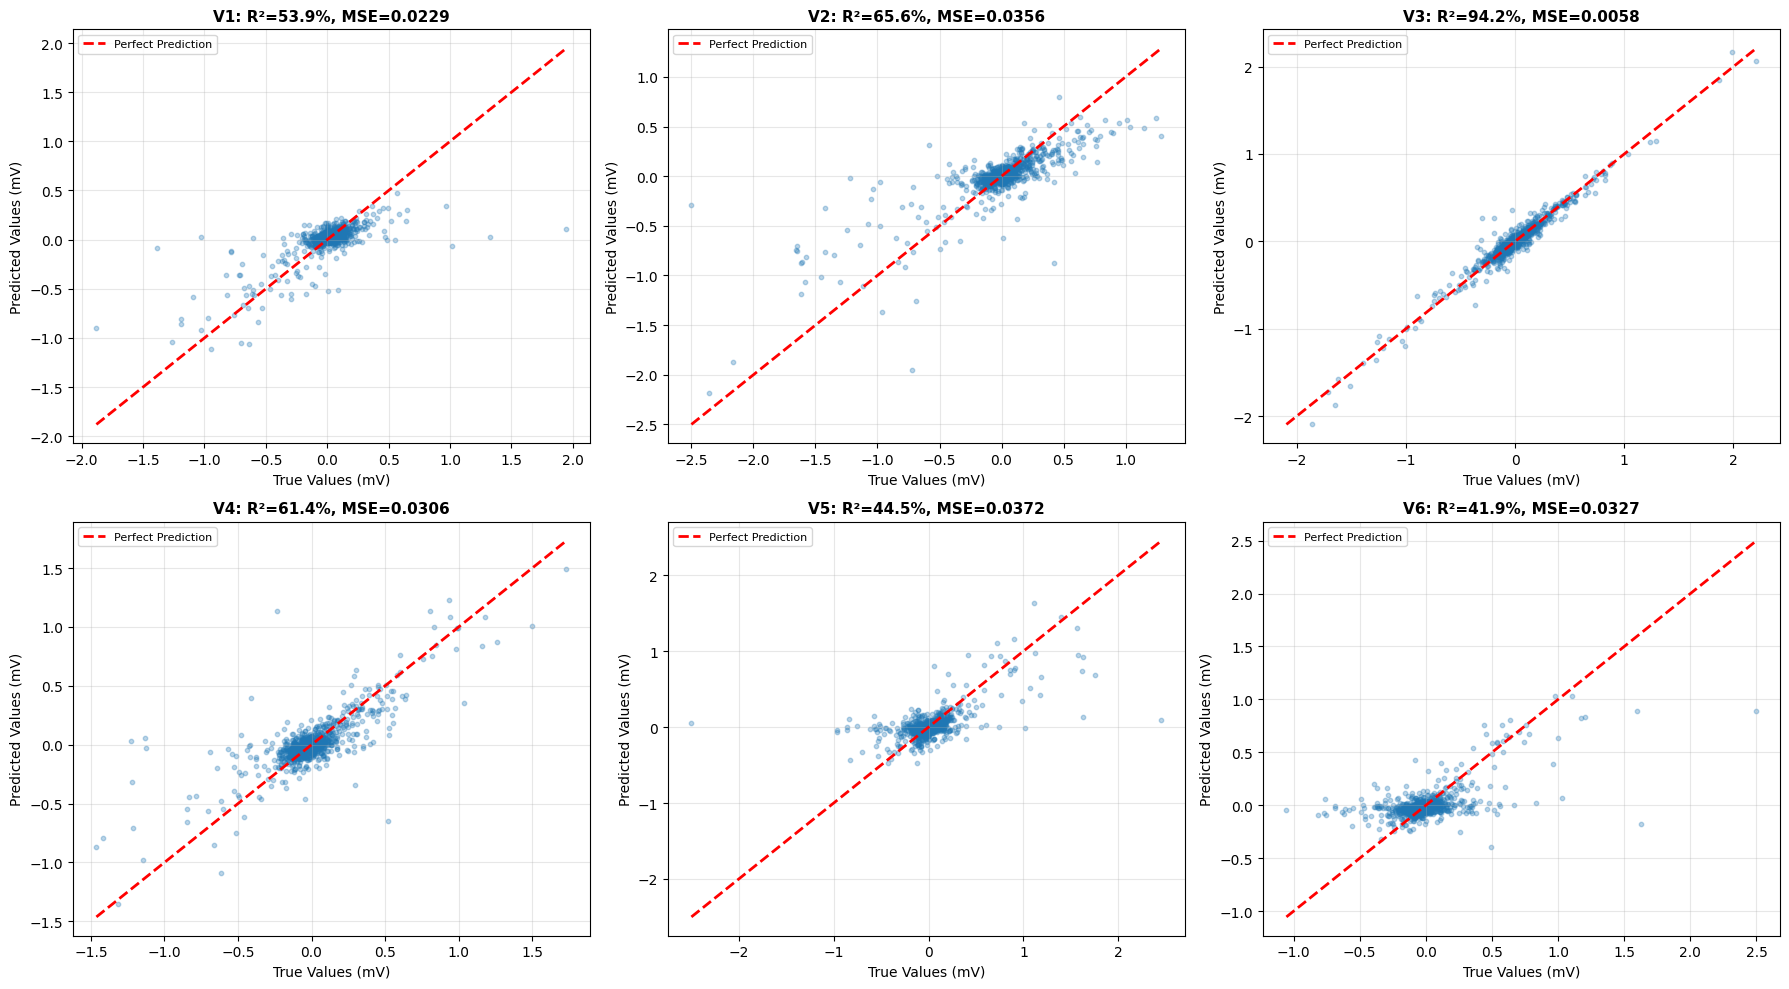

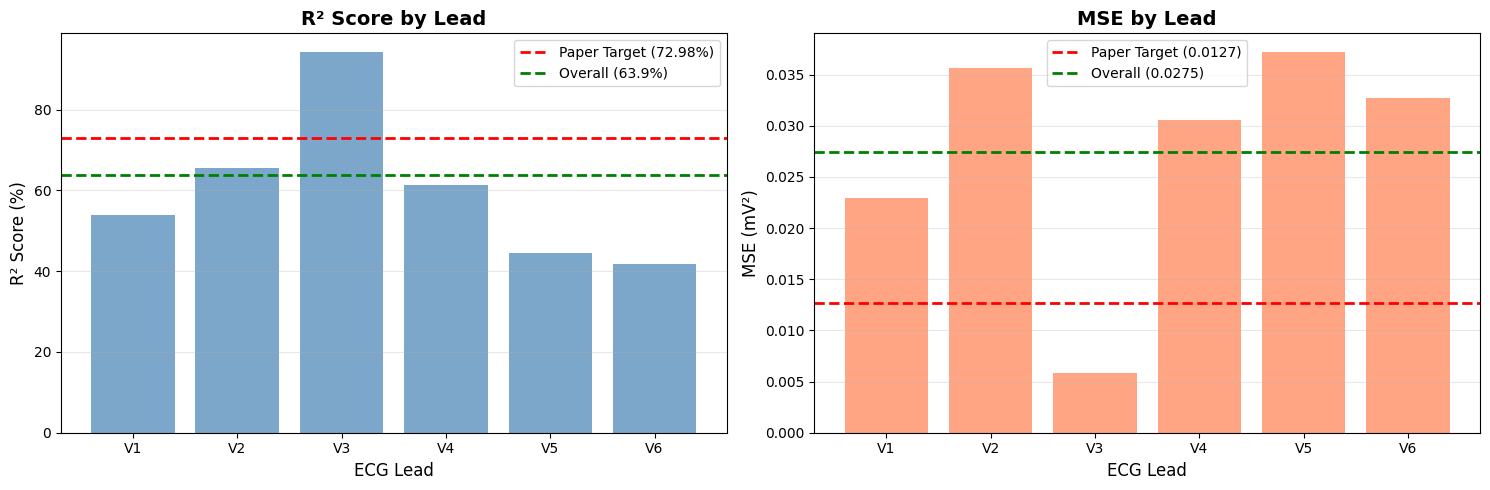


✅ Test metrics saved to: test_metrics.npy
✅ Visualizations saved to checkpoints directory


In [ ]:
import torch
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.append('/content/ecg_reconstruction')
from learn_functions.reconstructor import Reconstructor
from training_functions.reconstruction_functions import process_batch
from load_functions.ptbxl_loader import PTBXLDataLoader

# Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_path = '/content/data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1'
batch_size = 16
min_value = -2.5
amplitude = 5.0
sample_num = 2500

# Recreate the data loader
print("Loading data...")
data_loader = PTBXLDataLoader(data_path, batch_size, sample_num, min_value, amplitude)

# Recreate the model
print("Creating model...")
model = Reconstructor(
    input_lead_num=3,
    output_lead_num=6,
    input_channel_per_lead=32,
    middle_channel_per_lead=32,
    output_channel_per_lead=32,
    block_per_input_network=3,
    block_per_middle_network=2,
    block_per_output_network=3,
    input_kernel_size=17,
    middle_kernel_size=17,
    output_kernel_size=17,
    activation_function='relu',
    use_residual_block=True,
    device=device
)

# Load the best model weights
print("Loading best model weights...")
checkpoint_path = '/content/drive/MyDrive/IMLE-Net-Project/checkpoints/best_model/'
model.load_state_dict(checkpoint_path)
print("✅ Model loaded successfully!")

# Storage for predictions and targets
all_predictions = []
all_targets = []

# Evaluate on test set
print("\nEvaluating on test set...")
with torch.no_grad():
    test_gen = data_loader.get_test_batch_generator()
    pbar = tqdm(enumerate(test_gen), total=data_loader.test_batches, desc='Testing')

    for batch_idx, batch in pbar:
        model_input, model_target = process_batch(batch, 3, 6, min_value, amplitude, device)
        model_output = model.forward(model_input)

        # --- FIX STARTS HERE ---
        # 1. Handle model_output (you already had this)
        if isinstance(model_output, list):
            model_output = torch.cat(model_output, dim=1)  # [batch, 6, samples]

        # 2. Handle model_target (Apply the same fix here)
        if isinstance(model_target, list):
            model_target = torch.cat(model_target, dim=1)
        # --- FIX ENDS HERE ---

        # Now both are tensors, so .cpu() will work
        all_predictions.append(model_output.cpu().numpy())
        all_targets.append(model_target.cpu().numpy())

# Concatenate all batches
predictions = np.concatenate(all_predictions, axis=0)
targets = np.concatenate(all_targets, axis=0)

print(f"\nPredictions shape (Original): {predictions.shape}")
print(f"Targets shape (Original): {targets.shape}")

# --- FIX: RESHAPE ARRAYS ---
# Reshape from (Batch, 15000) to (Batch, 6, 2500)
# We assume the order is [Batch, Lead, Time], so we reshape accordingly.
num_leads = 6
sample_length = 2500

predictions = predictions.reshape(-1, num_leads, sample_length)
targets = targets.reshape(-1, num_leads, sample_length)

print(f"Predictions shape (Reshaped): {predictions.shape}")
print(f"Targets shape (Reshaped): {targets.shape}")
# ---------------------------

# Calculate metrics per lead
lead_names = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']
print("\n" + "=" * 80)
print("PER-LEAD ACCURACY METRICS")
print("=" * 80)

lead_metrics = []
for lead_idx in range(6):
    # Now this indexing will work because arrays are 3D
    pred_lead = predictions[:, lead_idx, :].flatten()
    target_lead = targets[:, lead_idx, :].flatten()

    # Calculate metrics
    r2 = r2_score(target_lead, pred_lead)
    mse = mean_squared_error(target_lead, pred_lead)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target_lead, pred_lead)
    corr, _ = pearsonr(target_lead, pred_lead)

    lead_metrics.append({
        'lead': lead_names[lead_idx],
        'r2': r2,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'correlation': corr
    })

    print(f"\n{lead_names[lead_idx]}:")
    print(f"  R² Score:     {r2*100:6.2f}%")
    print(f"  MSE:          {mse:.6f} mV²")
    print(f"  RMSE:         {rmse:.6f} mV")
    print(f"  MAE:          {mae:.6f} mV")
    print(f"  Correlation:  {corr:.4f}")

# Calculate overall metrics
print("\n" + "=" * 80)
print("OVERALL ACCURACY METRICS")
print("=" * 80)

pred_flat = predictions.flatten()
target_flat = targets.flatten()

overall_r2 = r2_score(target_flat, pred_flat)
overall_mse = mean_squared_error(target_flat, pred_flat)
overall_rmse = np.sqrt(overall_mse)
overall_mae = mean_absolute_error(target_flat, pred_flat)
overall_corr, _ = pearsonr(target_flat, pred_flat)

print(f"\nOverall Performance:")
print(f"  R² Score:     {overall_r2*100:6.2f}%")
print(f"  MSE:          {overall_mse:.6f} mV²")
print(f"  RMSE:         {overall_rmse:.6f} mV")
print(f"  MAE:          {overall_mae:.6f} mV")
print(f"  Correlation:  {overall_corr:.4f}")

print(f"\nPaper Target:")
print(f"  R² Score:     72.98%")
print(f"  MSE:          0.012700 mV²")

print(f"\nGap from Paper:")
print(f"  R² Gap:       {72.98 - overall_r2*100:+.2f}%")
print(f"  MSE Gap:      {overall_mse - 0.0127:+.6f} mV²")

print("\n" + "=" * 80)

# Create comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for lead_idx in range(6):
    ax = axes[lead_idx]

    # Get R² for this lead
    r2 = lead_metrics[lead_idx]['r2']
    mse = lead_metrics[lead_idx]['mse']

    # Sample 1000 random points for visualization
    sample_indices = np.random.choice(predictions.shape[0] * predictions.shape[2],
                                     size=min(1000, predictions.shape[0] * predictions.shape[2]),
                                     replace=False)

    pred_sample = predictions[:, lead_idx, :].flatten()[sample_indices]
    target_sample = targets[:, lead_idx, :].flatten()[sample_indices]

    # Scatter plot
    ax.scatter(target_sample, pred_sample, alpha=0.3, s=10)

    # Perfect prediction line
    min_val = min(target_sample.min(), pred_sample.min())
    max_val = max(target_sample.max(), pred_sample.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

    ax.set_xlabel('True Values (mV)', fontsize=10)
    ax.set_ylabel('Predicted Values (mV)', fontsize=10)
    ax.set_title(f'{lead_names[lead_idx]}: R²={r2*100:.1f}%, MSE={mse:.4f}',
                fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/IMLE-Net-Project/checkpoints/test_accuracy_scatter.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Bar chart comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# R² comparison
r2_values = [m['r2']*100 for m in lead_metrics]
ax1.bar(lead_names, r2_values, color='steelblue', alpha=0.7)
ax1.axhline(y=72.98, color='red', linestyle='--', linewidth=2, label='Paper Target (72.98%)')
ax1.axhline(y=overall_r2*100, color='green', linestyle='--', linewidth=2, label=f'Overall ({overall_r2*100:.1f}%)')
ax1.set_ylabel('R² Score (%)', fontsize=12)
ax1.set_xlabel('ECG Lead', fontsize=12)
ax1.set_title('R² Score by Lead', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# MSE comparison
mse_values = [m['mse'] for m in lead_metrics]
ax2.bar(lead_names, mse_values, color='coral', alpha=0.7)
ax2.axhline(y=0.0127, color='red', linestyle='--', linewidth=2, label='Paper Target (0.0127)')
ax2.axhline(y=overall_mse, color='green', linestyle='--', linewidth=2, label=f'Overall ({overall_mse:.4f})')
ax2.set_ylabel('MSE (mV²)', fontsize=12)
ax2.set_xlabel('ECG Lead', fontsize=12)
ax2.set_title('MSE by Lead', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/IMLE-Net-Project/checkpoints/test_accuracy_bars.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Save metrics to file
metrics_summary = {
    'per_lead': lead_metrics,
    'overall': {
        'r2': overall_r2,
        'mse': overall_mse,
        'rmse': overall_rmse,
        'mae': overall_mae,
        'correlation': overall_corr
    },
    'paper_target': {
        'r2': 0.7298,
        'mse': 0.0127
    }
}

np.save('/content/drive/MyDrive/IMLE-Net-Project/checkpoints/test_metrics.npy', metrics_summary)
print(f"\n✅ Test metrics saved to: test_metrics.npy")
print(f"✅ Visualizations saved to checkpoints directory")